In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# location to save figures
import os
cwd = os.getcwd()
figure_path = cwd + '/figures/'

# Abundance Matching

Build SHAM mocks for ECO and Resolve.

In [3]:
from eco_mocks.galaxy_abundance_functions import Eckert_2016_phi
from AbundanceMatching import *

In [4]:
# choose abundance function
phi_1 = Eckert_2016_phi(sample='RESOLVE-B SMF single')

# tabulate stellar mass function
msample = np.logspace(5,12,1000)
nsample = phi_1(msample)
af = AbundanceFunction(np.log10(msample), nsample, faint_end_first=True)

In [5]:
# load halo catalog
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from halotools import sim_manager
simname = 'vishnu_130'
halocat = sim_manager.CachedHaloCatalog(simname = simname, redshift=0.0, dz_tol = 0.001,
                                        version_name='custom', halo_finder='Rockstar')

In [6]:
from eco_mocks.sham_model import DeconvolveSHAM

In [7]:
from halotools.empirical_models import SubhaloModelFactory
from halotools.empirical_models import Behroozi10SmHm
sm_model =  DeconvolveSHAM(stellar_mass_function = phi_1, scatter=0.15, prim_haloprop='halo_vpeak')
model_instance = SubhaloModelFactory(stellar_mass = sm_model)

In [8]:
model_instance.populate_mock(halocat)
mock = model_instance.mock.galaxy_table

Lbox not found in halocat.


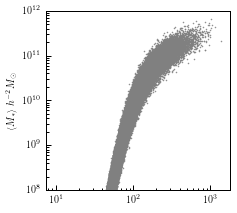

In [11]:
plt.figure(figsize=(3.3,3.3))
plt.plot(mock['halo_vpeak'], mock['stellar_mass'], '.', color='grey', ms=1)
plt.ylabel(r'$\langle M_{*}\rangle~h^{-2}M_{\odot}$')
plt.ylim([10**8.0,10**12.0])
#plt.xlim([10**9,10**15])
plt.xscale('log')
plt.yscale('log')
plt.show()